In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from scipy.stats import chi2
from math import floor

In [3]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 20
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1

c_list = ['tab:orange','crimson','forestgreen','darkmagenta','lightseagreen']

In [4]:
def chi2_red_calc(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    p_chi = chi2.sf(chi_cuadrado,grados_lib)

#    print('chi^2: ' + str(chi_cuadrado))
    print('chi^2 reducido: ' + str(chi_reducido)) ## tiene sentido que sea <1, pero que el pvalue sea 1?
#    print('p-valor del chi^2: ' + str(p_chi))
#    
#    if y_err[0]==0:
#        print('No se declararon errores en la variable y.')
#    elif p_chi<0.05:
#        print('Se rechaza la hipótesis de que el modelo ajuste a los datos.')
#    else:
#        print('No se puede rechazar la hipótesis de que el modelo ajuste a los datos.')
    return chi_reducido

def r2(y,x,lineal,pars):
    r2 = 1 - (np.sum((y-lineal(x,*pars))**2)/np.sum((y - np.mean(y))**2))
    return r2

In [13]:
hyp = lambda x,a : a/x
lineal_0 = lambda x,a : a*x
dcmls = lambda x : -int(floor(np.log10(abs(x))))
func_amp = lambda x,A,w,phi0,n : A*abs(np.sin(w*x+phi0))*np.e**(-n*x)
func_amp_a = lambda x,A,w,phi0 : A*abs(np.sin(w*x+phi0))

In [5]:
L_def = 0.80 # m
err_L = 0.05 # m

In [7]:
f1 = 742.5 # Hz
err_f1 = 1.5 # Hz
A0_1 = 0.1 # V

La velocidad del sonido es (340.0 ± 1.0) m/s
La longitud efectiva del tubo es (0.798848 ± 6e-06) m
chi^2 reducido: 10.147870610349617
chi^2 reducido: 1.281341392112643
0.9994629330399414


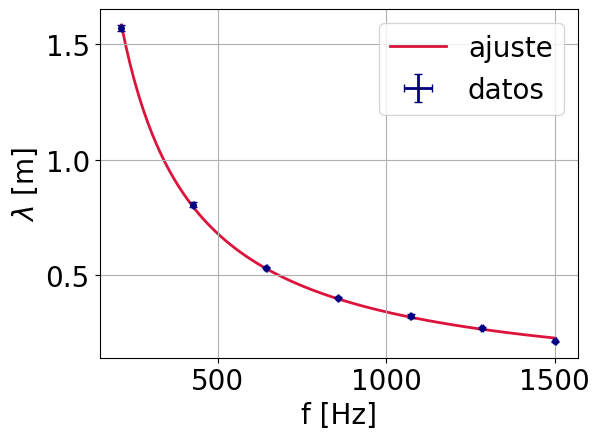

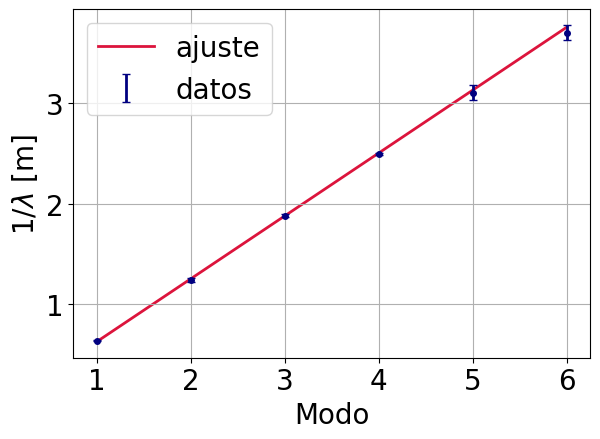

In [45]:
data1_c = np.loadtxt('tubo_cerrado_dist_nodos.csv',delimiter=',',unpack=True,skiprows=1)
f_c = np.array(data1_c[2])
dn1_c = np.array(data1_c[6])
dn2_c = np.array(data1_c[10])
err_f_c = np.array(data1_c[3])
err_dn1_c = np.array(data1_c[7])
err_dn2_c = np.array(data1_c[11])

dn_c = abs(dn1_c-dn2_c)/100
err_dn_c = np.sqrt(err_dn1_c**2+err_dn2_c**2)/100

lambdas_c = dn_c*2
err_lambdas_c = err_dn_c*2

pars1_c,cov1_c = cf(hyp,f_c,lambdas_c,sigma=err_lambdas_c,absolute_sigma=True)
vs1_c = pars1_c[0]
err_vs1_c = cov1_c[0,0]
x_adj1_c = np.linspace(min(f_c),max(f_c),100)
y_adj1_c = hyp(x_adj1_c,vs1_c)

print(f'La velocidad del sonido es ({np.round(vs1_c,dcmls(err_vs1_c))} ± {np.round(err_vs1_c,dcmls(err_vs1_c))}) m/s')

x2_c = np.arange(1,len(lambdas_c)+1,1)
pars2_c,cov2_c = cf(lineal_0,x2_c[:6],1/lambdas_c[:6],sigma=err_lambdas_c[:6]/lambdas_c[:6]**2,absolute_sigma=True)
a2_c = pars2_c[0]
err_a2_c = cov2_c[0,0]
x_adj2_c = np.linspace(min(x2_c),max(x2_c[:6]),100)
y_adj2_c = lineal_0(x_adj2_c,a2_c)
L_ef_c = 1/(2*a2_c)
err_L_ef_c = err_a2_c/(2*a2_c**2)

print(f'La longitud efectiva del tubo es ({np.round(L_ef_c,dcmls(err_L_ef_c))} ± {np.round(err_L_ef_c,dcmls(err_L_ef_c))}) m')

chi2_red_calc(lambdas_c,err_lambdas_c,f_c,hyp,pars1_c)
chi2_red_calc(1/lambdas_c[:6],err_lambdas_c[:6]/lambdas_c[:6]**2,x2_c[:6],lineal_0,pars2_c)
print(r2(1/lambdas_c[:6],x2_c[:6],lineal_0,pars2_c))

plt.plot(x_adj1_c,y_adj1_c,'crimson',label='ajuste',zorder=1)
plt.scatter(f_c,lambdas_c,c='navy',zorder=3)
plt.errorbar(f_c,lambdas_c,yerr=err_lambdas_c,xerr=err_f_c,fmt='none',ecolor='navy',label='datos',zorder=2)
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('$\lambda$ [m]')
plt.legend()
plt.savefig('c_f_lambda.png')
plt.show()
plt.plot(x_adj2_c,y_adj2_c,'crimson',label='ajuste',zorder=1)
plt.scatter(x2_c[:6],1/lambdas_c[:6],c='navy',zorder=3)
plt.errorbar(x2_c[:6],1/lambdas_c[:6],yerr=err_lambdas_c[:6]/lambdas_c[:6]**2,fmt='none',ecolor='navy',label='datos',zorder=2)
plt.grid()
plt.xlabel('Modo')
plt.ylabel('$1/\lambda$ [m]')
plt.legend()
plt.savefig('c_m_lambda.png')

chi^2 reducido: 608.555174322487
La longitud de onda es (0.46916374 ± 2e-08) m
La velocidad del sonido es (301.90687 ± 1e-05) m/s


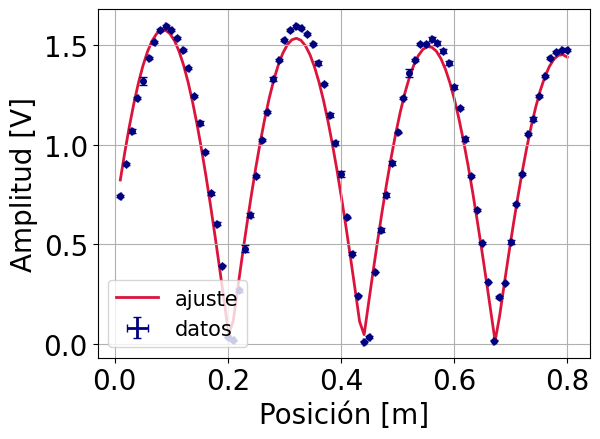

In [42]:
data2_c = np.loadtxt('tubo_cerrado_amp_x.csv',delimiter=',',unpack=True,skiprows=1)
d_c = np.array(data2_c[0])/100
amp_c = np.array(data2_c[4])/2
err_d_c = np.array(data2_c[1])/100
err_amp_c = np.array(data2_c[5])/2

pars3_c,cov3_c = cf(func_amp,d_c,amp_c,sigma=err_amp_c,absolute_sigma=True,p0=[1.6,2*np.pi/0.45,0.2,0.2])
A3_c,k3_c,phi03_c,n3_c = pars3_c
err_A3_c = cov3_c[0,0]
err_k3_c = cov3_c[1,1]
err_phi03_c = cov3_c[2,2]
err_n3_c = cov3_c[3,3]
x_adj3_c = np.linspace(min(d_c),max(d_c),100)
y_adj3_c = func_amp(x_adj3_c,A3_c,k3_c,phi03_c,n3_c)

chi2_red_calc(amp_c,err_amp_c,d_c,func_amp,pars3_c)

lambda3_c = 2*np.pi/k3_c
err_lambda3_c = 2*np.pi*err_k3_c/k3_c**2
vs_w_c = 643.5*lambda3_c
err_vs_w_c = 643.5*err_lambda3_c

print(f'La longitud de onda es ({np.round(lambda3_c,dcmls(err_lambda3_c))} ± {np.round(err_lambda3_c,dcmls(err_lambda3_c))}) m')
print(f'La velocidad del sonido es ({np.round(vs_w_c,dcmls(err_vs_w_c))} ± {np.round(err_vs_w_c,dcmls(err_vs_w_c))}) m/s')


plt.plot(x_adj3_c,y_adj3_c,'crimson',label='ajuste',zorder=1)
plt.scatter(d_c,amp_c,c='navy',zorder=3)
plt.errorbar(d_c,amp_c,yerr=err_amp_c,xerr=err_d_c,fmt='none',ecolor='navy',label='datos',zorder=2)
plt.grid()
plt.xlabel('Posición [m]')
plt.ylabel('Amplitud [V]')
plt.legend(fontsize=15)
plt.savefig('c_wave.png')

La velocidad del sonido es (352.29 ± 0.01) m/s
chi^2 reducido: 310.0165834048784
0.9997093594530579


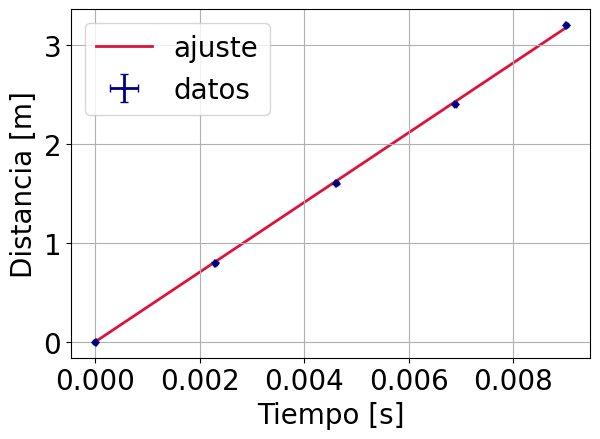

In [36]:
data3_c = np.loadtxt('pulso.csv',delimiter=',',unpack=True,skiprows=1)
t = np.array(data3_c[0])
dist = np.array(data3_c[2])
err_t = np.array(data3_c[1])
err_dist = np.array(data3_c[3])

dt = t-t[0]
err_dt = np.sqrt(2)*err_t
ddist = dist-dist[0]
err_ddist = np.sqrt(2)*err_dist

pars_p,cov_p = cf(lineal_0,dt,ddist,sigma=err_ddist,absolute_sigma=True)
vs_3 = pars_p[0]
err_vs_3 = cov_p[0,0]
x_adj_p = np.linspace(min(dt),max(dt),100)
y_adj_p = lineal_0(x_adj_p,vs_3)


print(f'La velocidad del sonido es ({np.round(vs_3,dcmls(err_vs_3))} ± {np.round(err_vs_3,dcmls(err_vs_3))}) m/s')

chi2_red_calc(ddist,err_ddist,dt,lineal_0,pars_p)
print(r2(ddist,dt,lineal_0,pars_p))

plt.plot(x_adj_p,y_adj_p,'crimson',label='ajuste',zorder=1)
plt.scatter(dt,ddist,c='navy',zorder=3)
plt.errorbar(dt,ddist,yerr=err_ddist,xerr=err_dt,fmt='none',ecolor='navy',label='datos',zorder=2)
plt.grid()
plt.xlabel('Tiempo [s]')
plt.ylabel('Distancia [m]')
plt.legend()
plt.savefig('pulso.png')

La velocidad del sonido es (339.9 ± 0.5) m/s
0.532
La longitud efectiva del tubo es (0.9286435 ± 5e-07) m
chi^2 reducido: 0.7872086420222755
chi^2 reducido: 555.7515899347426
0.9617978987967631


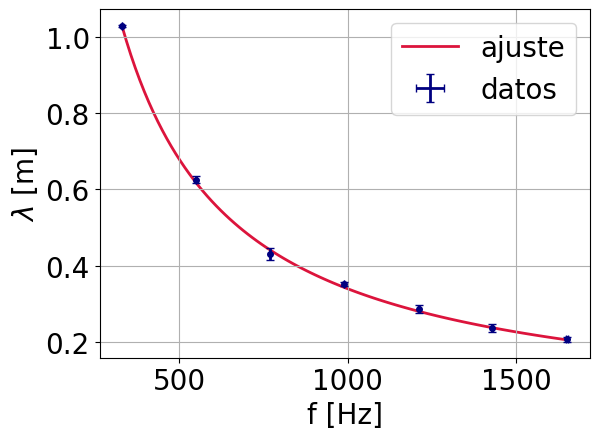

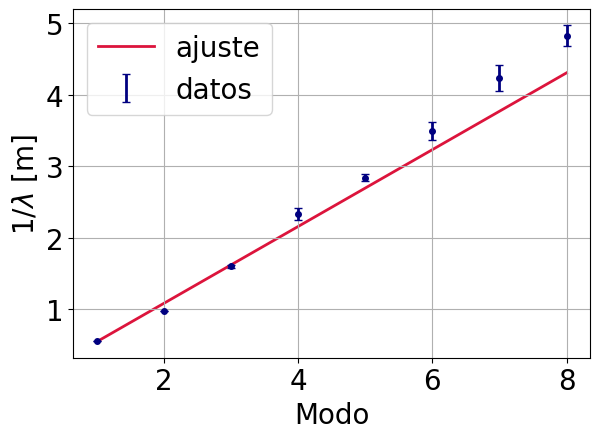

In [52]:
data1_a = np.loadtxt('tubo_abierto_dist_nodos.csv',delimiter=',',unpack=True,skiprows=1)
f_a = np.array(data1_a[2])
order = np.argsort(f_a)
f_a = f_a[order]
dn1_a = np.array(data1_a[6])[order]
dn2_a = np.array(data1_a[10])[order]
err_f_a = np.array(data1_a[3])[order]
err_dn1_a = np.array(data1_a[7])[order]
err_dn2_a = np.array(data1_a[11])[order]

dn_a = abs(dn1_a-dn2_a)/100
err_dn_a = np.sqrt(err_dn1_a**2+err_dn2_a**2)/100

lambdas_a = dn_a*2
err_lambdas_a = err_dn_a*2

pars1_a,cov1_a = cf(hyp,f_a[1:],lambdas_a[1:],sigma=err_lambdas_a[1:],absolute_sigma=True)
vs1_a = pars1_a[0]
err_vs1_a = cov1_a[0,0]
x_adj1_a = np.linspace(min(f_a[1:]),max(f_a),100)
y_adj1_a = hyp(x_adj1_a,vs1_a)

print(f'La velocidad del sonido es ({np.round(vs1_a,dcmls(err_vs1_a))} ± {np.round(err_vs1_a,dcmls(err_vs1_a))}) m/s')

x2_a = np.arange(1,len(lambdas_a)+1,1)
pars2_a,cov2_a = cf(lineal_0,x2_a,1/lambdas_a,sigma=err_lambdas_a/lambdas_a**2,absolute_sigma=True)
a2_a = pars2_a[0]
err_a2_a = cov2_a[0,0]
x_adj2_a = np.linspace(min(x2_a),max(x2_a),100)
y_adj2_a = lineal_0(x_adj2_a,a2_a)
L_ef_a = 1/(2*a2_a)
err_L_ef_a = err_a2_a/(2*a2_a**2)

print(lambdas_c[2])

print(f'La longitud efectiva del tubo es ({np.round(L_ef_a,dcmls(err_L_ef_a))} ± {np.round(err_L_ef_a,dcmls(err_L_ef_a))}) m')

chi2_red_calc(lambdas_a[1:],err_lambdas_a[1:],f_a[1:],hyp,pars1_a)
chi2_red_calc(1/lambdas_a,err_lambdas_a/lambdas_a**2,x2_a,lineal_0,pars2_a)
print(r2(1/lambdas_a,x2_a,lineal_0,pars2_a))

plt.plot(x_adj1_a,y_adj1_a,'crimson',label='ajuste',zorder=1)
plt.scatter(f_a[1:],lambdas_a[1:],c='navy',zorder=3)
plt.errorbar(f_a[1:],lambdas_a[1:],yerr=err_lambdas_a[1:],xerr=err_f_a[1:],fmt='none',ecolor='navy',label='datos',zorder=2)
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('$\lambda$ [m]')
plt.legend()
plt.savefig('a_f_lambda.png')
plt.show()
plt.plot(x_adj2_a,y_adj2_a,'crimson',label='ajuste',zorder=1)
plt.scatter(x2_a,1/lambdas_a,c='navy',zorder=3)
plt.errorbar(x2_a,1/lambdas_a,yerr=err_lambdas_a/lambdas_a**2,fmt='none',ecolor='navy',label='datos',zorder=2)
plt.grid()
plt.xlabel('Modo')
plt.ylabel('$1/\lambda$ [m]')
plt.legend()
plt.savefig('a_m_lambda.png')

chi^2 reducido: 1104.4223611688114
La longitud de onda es (0.5946549 ± 2e-07) m
La velocidad del sonido es (327.0602 ± 0.0001) m/s


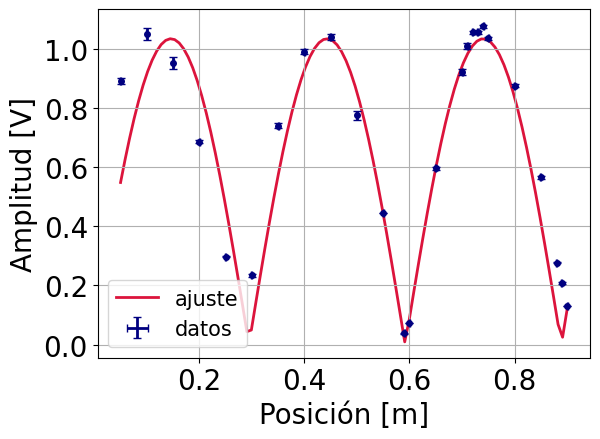

In [47]:
data2_a = np.loadtxt('tubo_abierto_amp_x.csv',delimiter=',',unpack=True,skiprows=1)
d_a = np.array(data2_a[0])/100
amp_a = np.array(data2_a[4])/2
err_d_a = np.array(data2_a[1])/100
err_amp_a = np.array(data2_a[5])/2

pars3_a,cov3_a = cf(func_amp_a,d_a,amp_a,sigma=err_amp_a,absolute_sigma=True,p0=[1.1,2*np.pi/0.6,0.25])
A3_a,k3_a,phi03_a = pars3_a
err_A3_a = cov3_a[0,0]
err_k3_a = cov3_a[1,1]
err_phi03_a = cov3_a[2,2]
x_adj3_a = np.linspace(min(d_a),max(d_a),100)
y_adj3_a = func_amp_a(x_adj3_a,A3_a,k3_a,phi03_a)

chi2_red_calc(amp_a,err_amp_a,d_a,func_amp_a,pars3_a)

lambda3_a = 2*np.pi/k3_a
err_lambda3_a = 2*np.pi*err_k3_a/k3_a**2
vs_w_a = 550*lambda3_a
err_vs_w_a = 550*err_lambda3_a

print(f'La longitud de onda es ({np.round(lambda3_a,dcmls(err_lambda3_a))} ± {np.round(err_lambda3_a,dcmls(err_lambda3_a))}) m')
print(f'La velocidad del sonido es ({np.round(vs_w_a,dcmls(err_vs_w_a))} ± {np.round(err_vs_w_a,dcmls(err_vs_w_a))}) m/s')

plt.plot(x_adj3_a,y_adj3_a,'crimson',label='ajuste',zorder=1)
plt.scatter(d_a,amp_a,c='navy',zorder=3)
plt.errorbar(d_a,amp_a,yerr=err_amp_a,xerr=err_d_a,fmt='none',ecolor='navy',label='datos',zorder=2)
plt.grid()
plt.xlabel('Posición [m]')
plt.ylabel('Amplitud [V]')
plt.legend(fontsize=15)
plt.savefig('a_wave.png')